# Homework set 3

Please **submit this Jupyter notebook through Canvas** no later than **mon nov. 21, 9:00**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. A pdf version can be made using the save and export option in the Jupyter Lab file menu.**

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Christos Perchanidis    (14601206)

River Vaudrin           (11877154)

Run the following cell to import numPy and Pyplot.

In [24]:
import numpy as np
from scipy.linalg import hilbert
import matplotlib.pyplot as plt

# Exercise 1

In this exercise you will study the accuracy of several methods for computing the QR decomposition. You are asked to implement these methods yourself. (However, when testing your implementation you may compare with an external implementation.)


## (a) 
Implement the classical and modified Gram-Schmidt procedures for computing the QR decomposition.

Include a short documentation using triple quotes: describe at least the input and the output, and whether the code modifies the input matrix.


In [19]:
def classical_gram_schmidt(A):
    '''
    Compute the QR factorization of a matrix.

    Factor the matrix A as QR, where Q is orthonormal and R is upper-triangular.

    Parameters
    A : array_like, shape (m, n)
        matrix to be factored.

    Returns
    Q : ndarray of float, matrix with orthonormal columns. 
    R : ndarray of float, upper-triangular matrix.

    Notes:
    Performs simplest Grahm-Schmidt. This method performs orthonormalisation in the most 
    numerically unstable manner. However, it does not change the original matrix (in the 
    way we implemented it, same as alg. 3.2 from Heath)

    '''

    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for k in range(n):
        Q[:, k] = A[:, k]
        for j in range(k):
            R[j, k] = np.transpose(Q[:, j]) @ A[:, k]
            Q[:, k] = Q[:, k] - R[j, k]*Q[:, j]
        R[k, k] = np.linalg.norm(Q[:, k])
        if R[k,k]==0: return
        Q[:, k] = Q[:, k]/R[k, k]
    return Q, R 


def modified_gram_schmidt(A):
    '''
    Compute the QR factorization of a matrix.

    Factor the matrix A as QR, where Q is orthonormal and R is upper-triangular.

    Parameters
    A : array_like, shape (m, n)
        matrix to be factored.

    Returns
    Q : ndarray of float, matrix with orthonormal columns. 
    R : ndarray of float, upper-triangular matrix.

    Notes
    Performs modified Grahm-Schmidt. Main difference are few re-arrangements. Mainly, 
    as soon as each new vector Q_k has been computed each of the remaining vectors is 
    immediately orthogonalized against it, generating R by rows rather than by columns. 
    This method has a smaller numerical error compared to classical one. However, it 
    does modify the original matrix.

    '''
    
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    for k in range(n):
        R[k, k] = np.linalg.norm(A[:, k])
        if R[k,k]==0: return        # Stop if linearly dependent
        Q[:, k] = A[:, k]/R[k, k]   # normalize current column
        for j in range(k+1, n):
            R[k, j] = np.transpose(Q[:, k]) @ A[:, j]
            #R[k, j] = np.dot(Q[:, k], A[:, j])
            A[:, j] -= R[k, j]*Q[:, k]
    return Q, R 


## (b) (a+b 3.5 pts)
Let $H$ be a Hilbert matrix of size $n$ (see Computer Problem 2.6). Study the quality of the QR decompositions obtained using the two methods of part (a), specifically the loss of orthogonality. In order to do so, plot the quantity $\| I - Q^T Q \|$ as a function of $n$ on a log scale. Vary $n$ from $2$ to $12$.



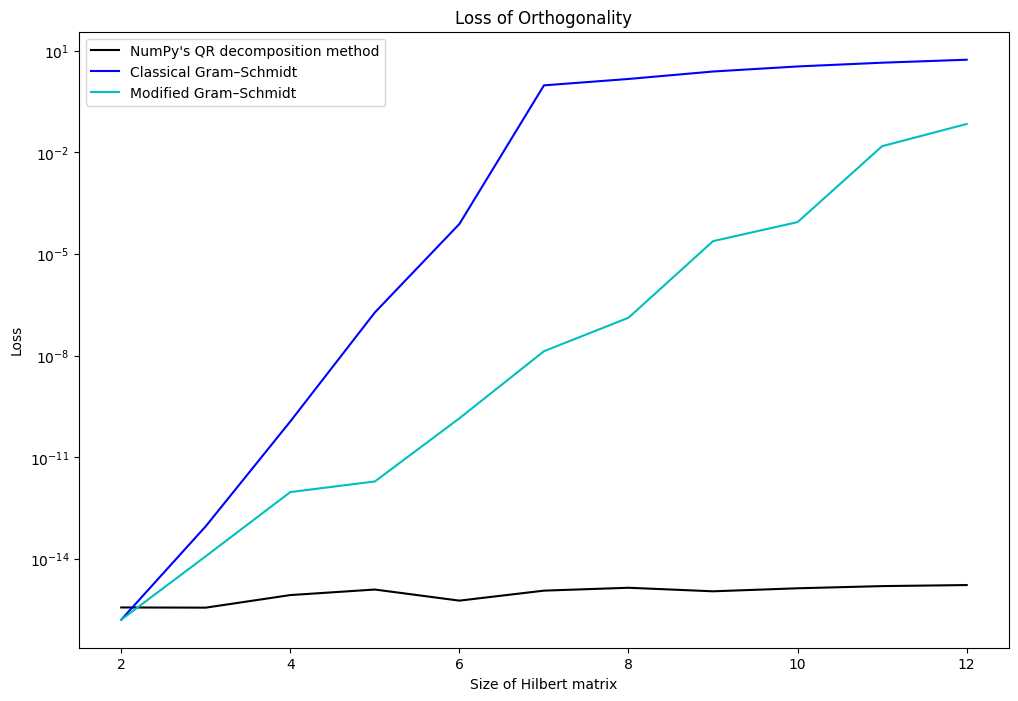

In [20]:
error_numpy = []
error_gs_clas = []
error_gs_mod = []
n_values = np.arange(2, 13) # So that 12 is included

for n in n_values:
    Q1, R1 = np.linalg.qr(hilbert(n))
    Q2, R2 = classical_gram_schmidt(hilbert(n))
    Q3, R3 = modified_gram_schmidt(hilbert(n))

    error_numpy.append(np.linalg.norm(np.identity(n) - Q1.transpose() @ Q1))
    error_gs_clas.append(np.linalg.norm(np.identity(n) - Q2.transpose() @ Q2))
    error_gs_mod.append(np.linalg.norm(np.identity(n) - Q3.transpose() @ Q3))


plt.rcParams["figure.figsize"] = (12,8)
plt.plot(n_values, error_numpy, color='k', label = "NumPy's QR decomposition method")
plt.plot(n_values, error_gs_clas, color='b', label = "Classical Gram–Schmidt")
plt.plot(n_values, error_gs_mod, color='c', label = "Modified Gram–Schmidt")

plt.title("Loss of Orthogonality")
plt.xlabel('Size of Hilbert matrix')
plt.ylabel('Loss')
plt.yscale("log")
plt.legend()
plt.show()

## (c) (1.5 pts)
Try applying the classical procedure twice. Plot again the loss of orthogonality when computing the QR decomposition of the Hilbert matrix of size $n$ as in (b).


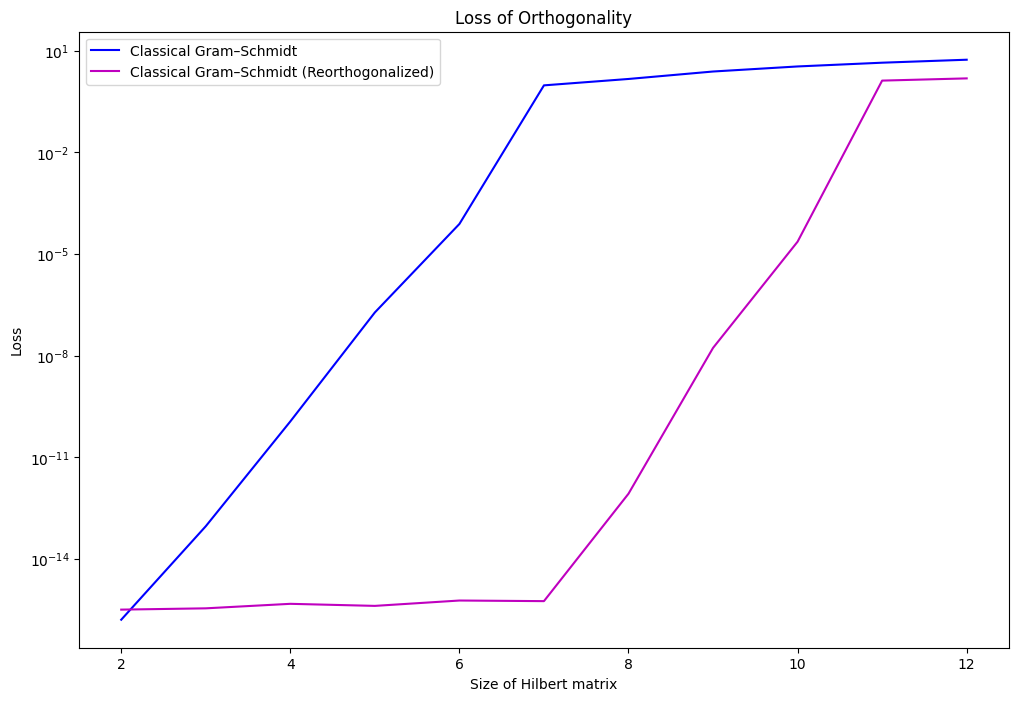

In [21]:
error_gs_clas = []
error_gs_clas_reorth = []

for n in n_values:
    Q1, R1 = classical_gram_schmidt(hilbert(n))
    Q2, R2 = classical_gram_schmidt(Q1)

    error_gs_clas.append(np.linalg.norm(np.identity(n) - Q1.transpose() @ Q1))
    error_gs_clas_reorth.append(np.linalg.norm(np.identity(n) - Q2.transpose() @ Q2))


plt.rcParams["figure.figsize"] = (12,8)
plt.plot(n_values, error_gs_clas, color='b', label = "Classical Gram–Schmidt")
plt.plot(n_values, error_gs_clas_reorth, color='m', label = "Classical Gram–Schmidt (Reorthogonalized)")

plt.title("Loss of Orthogonality")
plt.xlabel('Size of Hilbert matrix')
plt.ylabel('Loss')
plt.yscale("log")
plt.legend()
plt.show()

## (d) (2 pts)
Implement the Householder method for computing the QR decomposition. Remember to include a short documentation.

In [22]:
def householder_qr(A, p=False):
    '''
    Compute the QR factorization of a matrix.

    Factor the matrix A as QR, where Q is orthonormal and R is upper-triangular.

    Parameters
    A : array_like, shape (m, n)
        matrix to be factored.

    Returns
    Q : ndarray of float, matrix with orthonormal columns. 
    R : ndarray of float, upper-triangular matrix.

    Notes
    The Householder reflection method for QR decomposition The method produces its O 
    and its R by finding appropriate H (Householder reflection) matrices and multiplying 
    them from the left with the original matrix A to construct an upper triangulatar 
    matrix R. Unlike the Gram-Schmidt, the Housholder method does not explicitly form the
    Q matrix. However, the Q matrix is formed by multiplying all of the found H(ouseholder) 
    matrices. 
    
    '''

    # dimension of A
    n = len(A)

    # initialize result matrixes Q and R
    Q = np.zeros([n,n])
    R = A
    
    # initialize identity matrix of same size of A
    I = np.identity(n)

    # loop over columns
    for k in range(n-1):
        # select column of R, if not first itteration add zeros above current diagonal
        a = np.array([0 for i in range(k)] + [row[k] for row in R[k:]])[np.newaxis]

        # select corresponding basis vector
        e = np.array([row[k] for row in I])[np.newaxis]

        # find current householder vector
        u = np.sign(a[0][k]) * np.linalg.norm(a) * e
        v = a + u
        
        # calculate householder transformation
        beta = 2 / np.inner(v, v) * (v.T @ v)
        H = I - beta

        # update R
        R = H @ R

        # update Q
        if np.all(Q==0):
            Q = H
        else:
            Q = Q @ H

        # if true, print intermediate steps
        if p:
            print("ITTERATION: {}".format(k))
            print("a:", a)
            print("e:", e)
            print("u:", u)
            print("v:", v)
            print("beta:", beta)
            print("I:\n", I)
            print("H:\n", H)
            print("R:\n", R)
            print("Q:\n", Q)

    return Q, R

A = hilbert(3)
#print("Hilbert matrix:\n", A,"\n-------------")

q, r = np.linalg.qr(A)
# print("numPy QR-decmoposition:\nQ:\n{}\nR:\n{}\n-------------".format(q,r))

Q, R = householder_qr(A)
# print("Our Householder QR-decomposition:\nQ:\n{}\nR:\n{}\n-------------".format(Q,R))


## (e) (2 pts)
Perform the analysis of (b) for the Householder method. Discuss the differences between all the methods you have tested so far. Look online and/or in books for information about the accuracy of the different methods and include this in your explanations (with reference).


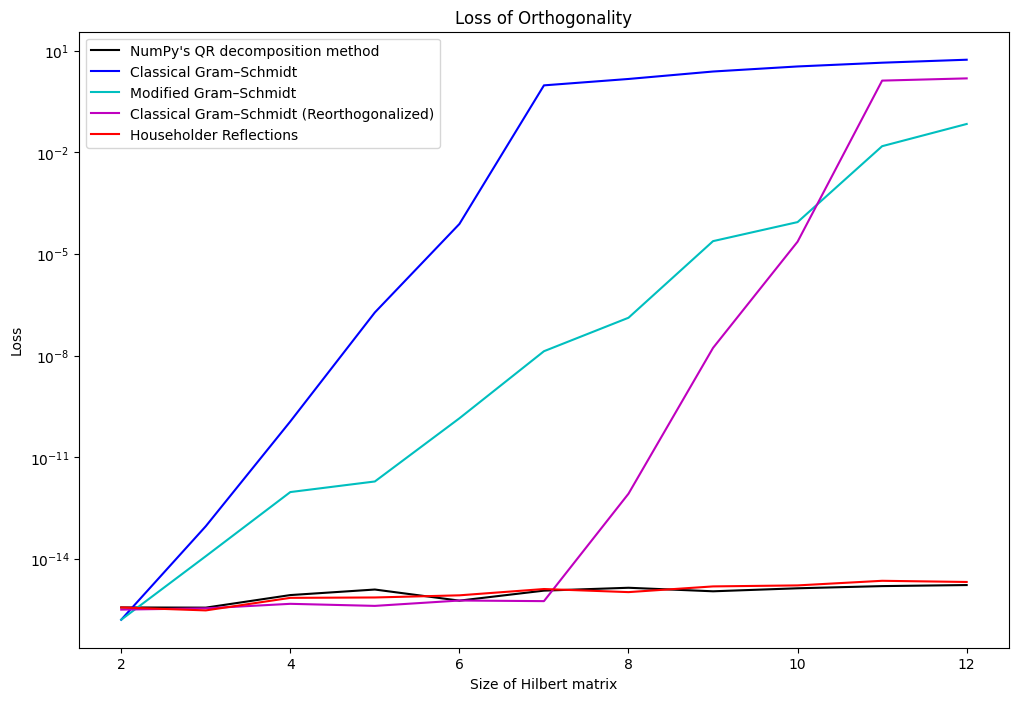

In [27]:
error_householder = []

for n in n_values:
    Q, R = householder_qr(hilbert(n))
    error_householder.append(np.linalg.norm(np.identity(n) - Q.transpose() @ Q))

plt.rcParams["figure.figsize"] = (12,8)
plt.plot(n_values, error_numpy, color='k', label = "NumPy's QR decomposition method")
plt.plot(n_values, error_gs_clas, color='b', label = "Classical Gram–Schmidt")
plt.plot(n_values, error_gs_mod, color='c', label = "Modified Gram–Schmidt")
plt.plot(n_values, error_gs_clas_reorth, color='m', label = "Classical Gram–Schmidt (Reorthogonalized)")
plt.plot(n_values, error_householder, color='r', label="Householder Reflections")

plt.title("Loss of Orthogonality")
plt.xlabel('Size of Hilbert matrix')
plt.ylabel('Loss')
plt.yscale("log")
plt.legend()
plt.show()


**Answer:**

As can be seen the results differ, and each of the implemented methods worked better than the previous ones. Classical Gram-Schmidt is not numerically accurate, as orthogonality among the computed Qk tends to be lost due to rounding error. *(Heath, 2018)* Also, it uses a lot of storage, we keep matrices Q, R, and A.
To improve Gram-Schmidt method we made few re-arrangements, but kept algorithm same mathematically. Main change is the fact that as soon as each new vector Q_k has been computed each of the remaining vectors are immediately orthogonalized against it, generating R by rows rather than by columns. This method has a smaller numerical error compared to classical one. However, it does modify the original matrix.

To further improve the accuracy we can reorthorgonalize the already found matrix Q. To do so, we can simply calculate Gram-Schmidt again with the found Q matrix and get reorthorgonalized matrix Q1. As can be seen from the graph, classical Gram-Schmidt becomes comparable to the modified one even after one iteration of reorthorganization. Futher improvements are possible, as we can run orthoganalization algorithms multiple times. We can even run multiple times different implementations of Gram-Schmidt algorithm classical and modified, as shown by L. Giraud and J. Langou and M. Rozloznik in *"The loss of orthogonality in the Gram-Schmidt orthogonalization process" (2005)* results are becoming very numerically stable even with only 2 iterations of the modified Gram-Schmidt. Obviously, the main drawback to this approach is the computational intensity of running orthoganalization multiple times. Also, depending on the task, we might need to keep all of the found matrices in memory.

For a more drastical improvements in stability, the Householder algorithm can be used. The main difference that leads to this additional stability is that the Gram-Schmidt method directly orthogonalizes the columns of A, where the Householder method computes the Q by calculating the product of the more accurate Householder reflections. This differences causes that the results of the Gram-Schmidt method can lead in a non-orthogonal Q matrix, which ensures that the loss of orthogonality is much higher for this method compared to the Householder method. In the case of Gram-Schmidt the loss of orthogonality is linear to the condition number of A, this can also be observed in the plot as the Hilbert matrix is a matrix of which is size is linear to its condition number. However it should be noted that, as James and Roger Longley found in their paper *"Accuracy of Gram–Schmidt orthogonalization and Householder transformation for the solution of linear least squares problems" (1997)*, the Householder method shouldn't be considered better than the Gram-Schmidt method because of its better produced orthogonal vectors. They found that the decision on what method to use should be based on the problem at hand, as they for example proved that Gram-Schmidt actually produces more accurate solution vectors for the linear least squares problem than the Householder method.
